# Proyek Analisis Data: Bike Sharing Analysis
- Nama: Ringga Setiadi
- Email: garenkosburne@gmail.com
- Id Dicoding:ringga__LobT

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana variasi ketersediaan sepeda berdasarkan kondisi cuaca (weathersit) pada hari tertentu? Apakah cuaca yang baik memengaruhi peningkatan penyewaan?
- pertanyaan 2 : Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda harian? Apakah terdapat tren atau pola tertentu?
- pertanyaan 3 : Apakah ada perbedaan antara distribusi penyewaan sepeda antara weekend dan weekdays?
- pertanyaan 4 : Bagaimana kontribusi pengguna casual dan registered terhadap total penyewaan sepeda?

## Menyiapkan semua library yang dibuthkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from os import path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [14]:
#uploading dataset yang digunakan
path_dataset_day_df = '/content/drive/MyDrive/Tugas Akhir Project Visualisasi Data by Phyton/day.csv'
path_dataset_hour_df = '/content/drive/MyDrive/Tugas Akhir Project Visualisasi Data by Phyton/hour.csv'

In [15]:
day_df = pd.read_csv(path_dataset_day_df)
hour_df = pd.read_csv(path_dataset_hour_df)

### Assessing Data

In [16]:
#Melihat baris awal (5 baris pertama) untuk setiap dataset
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Cleaning Data

In [17]:
#pengecekan missing value pada dataset

print(day_df.isnull().sum())
print(hour_df.isnull().sum())

#Menghapus 'instant' karena tidak memberikan informasi untuk pertanyaan

day_df.drop('instant', axis=1, inplace=True)
hour_df.drop('instant', axis=1, inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

In [18]:
print(day_df.describe())
print(hour_df.describe())

           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.0774

In [19]:
# Merubah kolom 'dteday' menjadi tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [20]:
# Menentukan tanggal terakhir dalam dataset
last_date = day_df['dteday'].max()

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana variasi ketersediaan sepeda berdasarkan kondisi cuaca (weathersit) pada hari tertentu? Apakah cuaca yang baik memengaruhi peningkatan penyewaan?

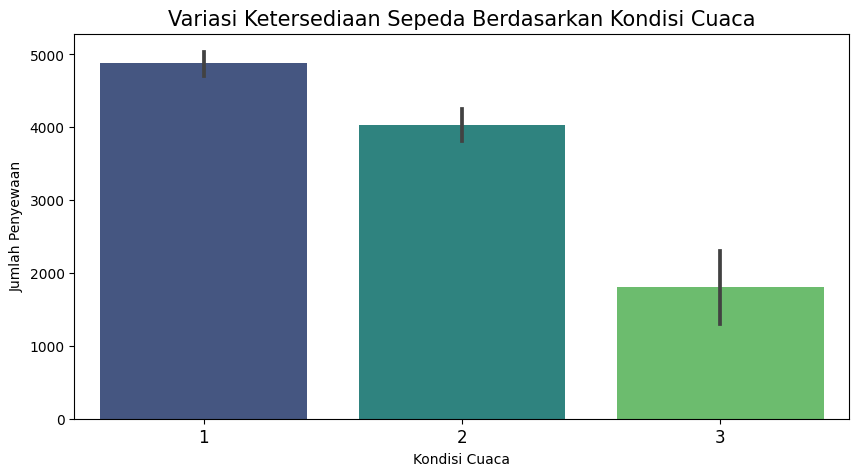

In [25]:
# Ketersediaan sepeda berdasarkan kondisi cuaca (weathersit)
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weathersit",
    data=day_df,
    palette="viridis"
)
plt.title("Variasi Ketersediaan Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Kondisi Cuaca")
plt.tick_params(axis='x', labelsize=12)
plt.show()


### Pertanyaan 2:Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda harian? Apakah terdapat tren atau pola tertentu?

<ipython-input-26-01f8eae96a54>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


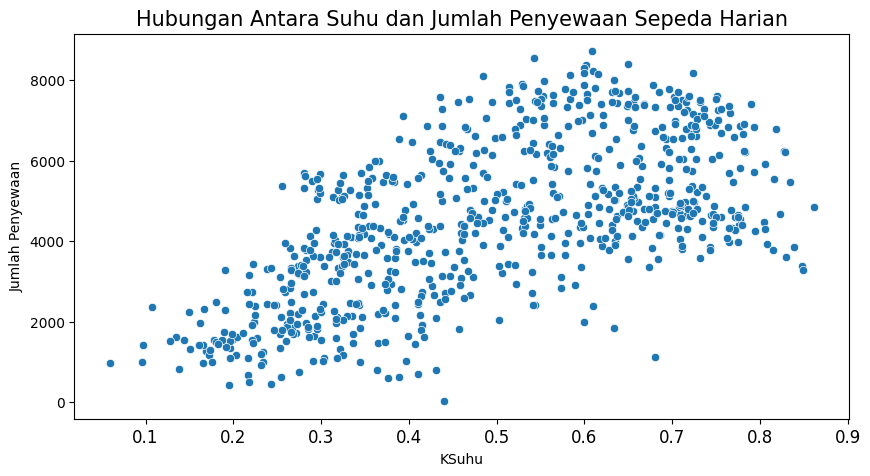

In [26]:
# Hubungan antara suhu dan jumlah penyewaan sepeda harian

plt.figure(figsize=(10, 5))

sns.scatterplot(
    y="cnt",
    x="temp",
    data=day_df,
    palette="viridis"
)
plt.title("Hubungan Antara Suhu dan Jumlah Penyewaan Sepeda Harian", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("KSuhu")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Apakah ada perbedaan antara distribusi penyewaan sepeda antara weekend dan weekdays?

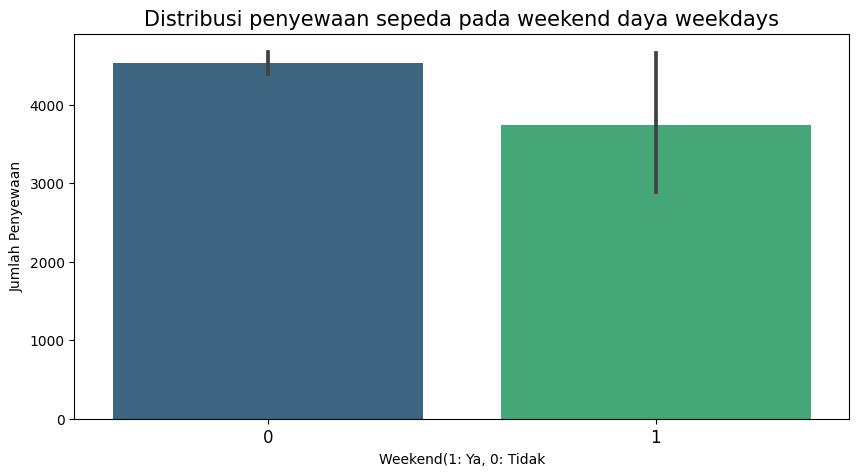

In [23]:
#Distribusi penyewaan sepeda pada weekend dan weekdays

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="holiday",
    data=day_df,
    palette="viridis"
)
plt.title("Distribusi penyewaan sepeda pada weekend daya weekdays", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Weekend(1: Ya, 0: Tidak")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana kontribusi pengguna casual dan registered terhadap total penyewaan sepeda?

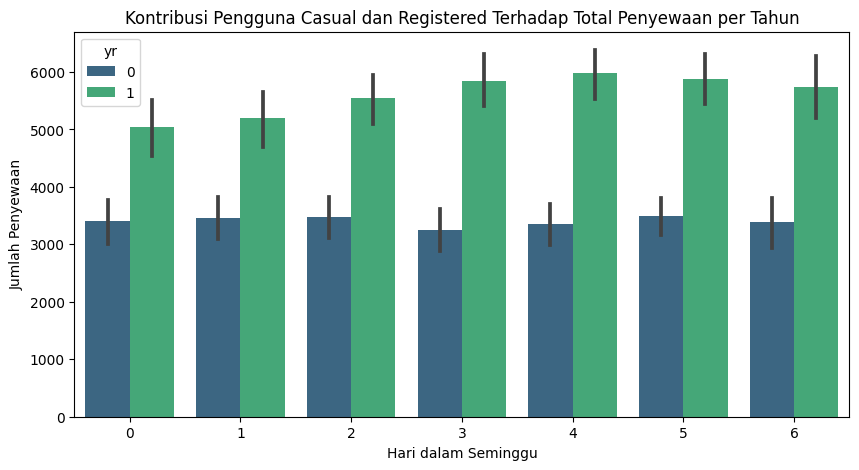

In [24]:
# Plotting kontribusi pengguna casual dan registered per tahun

plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='weekday', y='cnt', hue='yr', palette='viridis')
plt.title('Kontribusi Pengguna Casual dan Registered Terhadap Total Penyewaan per Tahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.show()


## Conclusion

**Conclution pertanyaan 1**: Berdasarkan barplot kondisi cuaca terhadap jumlah penyewaan dapat saya simpulkan menjadi:
- weathersit 1 : pada kondisi ini cuaca baik yang berpengaruh pada tingginya penyewaan sepeda.
-weathersit 2 dan 3 : pada kondisi ini cuaca lebih buruk sehingga terjadi penurunan penyewaan sepeda

**Conclution pertanyaan 2**: berdasarkan visualisasi berdasarkan scatterplot dapat disimpulkan bahwa semakin tinggi cuaca maka semakin tinggi pula jumlah penyewaan sepeda. Hal ini sejalan dengan conlusin pertanyaan 1.

**Conclution pertanyaan 3**: berdasrakan barplot menunujukan hasil bahwa tingkat penyewaan pada *weekdays* lebih tinggi dari pada *weekend*. Hal ini terjadi karena pada saat cuaca yang baik kecenderungan dari orang-orang untuk keluar rumah untuk menikmati keindahan alam.

**Conclution pertanyaan 4**: berdasarkan barplot dapat ditarik kesimpulan bahwa:
- pada tahun 2011 dan 2012 terlihat pengguna casual dan registered terhadap penyewaan sepeda cukup seragam.
- pengguna registered memberikan kontribusi lebih tinggi dibandingkan casual dalam penyewaan sepeda.
- karena tingginya pengguna registered dalam penyewaan sepeda, maka bisnis bisa meningkatkan jumlah pengguna registerednya untuk meningkatkan volume penyewaan ini.
